Objetivo:
 
Predecir el nivel de satisfacción de un pasajero en base a sus datos (edad, distancia de vuelo, tipo de vuelo, etc) para captar potenciales clientes a los que ofrecerles ingresar en un programa de pasajeros frecuentes (satisfechos) o en un programa de promociones y beneficios (no satisfechos)



Descripción de variables y distribución:
1. Gender: Género de los pasajeros (Female, Male)
2. Customer Type: Tipo de cliente (Loyal, Disloyal)
3. Age: Edad de los pasajeros (7-85)
4. Type of Travel: Propósito del vuelo de los pasajeros (Personal Travel, Business Travel)
5. Class: Clase del viaje (Business, Eco, Eco Plus)
6. Flight distance: Distancia del vuelo
7. Inflight wifi service: Nivel de satisfacción del servicio wifi a bordo (0:No Aplica;1-5)
8. Departure/Arrival time convenient: Nivel de satisfacción del tiempo de salida/llegada (0-5)
9. Ease of Online booking: Nivel de satisfacción de la reserve online (0-5)
10. Gate location: Nivel de satisfacción de la ubicación de la puerta (0-5)
11. Food and drink: Nivel de satisfacción de la comida y bebida (0-5)
12. Online boarding: Nivel de satisfacción del embarque online (0-5)
13. Seat comfort: Nivel de satisfacción de la comodidad del asiento (0-5)
14. Inflight entertainment: Nivel de satisfacción del entretenimiento a bordo (0-5)
15. On-board service: Nivel de satisfacción del servicio a bordo (0-5)
16. Leg room service: Nivel de satisfacción del espacio para las piernas (0-5)
17. Baggage handling: Nivel de satisfacción del manejo del equipaje (0-5)
18. Check-in service: Nivel de satisfacción del Check-in (0-5)
19. Inflight service: Nivel de satisfacción del servicio durante el vuelo (0-5)
20. Cleanliness: Nivel de satisfacción de la limpieza (0-5)
21. Departure Delay in Minutes: Minutos de retraso en la salida
22. Arrival Delay in Minutes: Minutos de retraso en la llegada
23. Satisfaction: Nivel de satisfacción de la aerolínea (Satisfaction, neutral or dissatisfaction)

Indicación de la fuente del dataset:

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

Presentación de la empresa:
 
Japan Airlines, o JAL, es una compañía aérea con base en Shinagawa, Tokio. Es también la aerolínea de bandera de Japón, que opera desde sus bases ubicadas en el Aeropuerto Internacional de Haneda y Aeropuerto Internacional de Narita más sus bases regionales o secundarias que serían: el Aeropuerto Internacional de Osaka-Itami, Aeropuerto Internacional de Kansai y Aeropuerto Internacional de Chubu. La compañía japonesa JAL posee una aerolínea regional, J-Air.
Esta aerolínea opera la mayoría de rutas nacionales de largo y medio alcance hasta un vuelo de media hora, y también opera a una ciudad internacional que es Shanghái. Sus principales destinos son destinos regionales que cuentan con solo aeroparques nacionales.
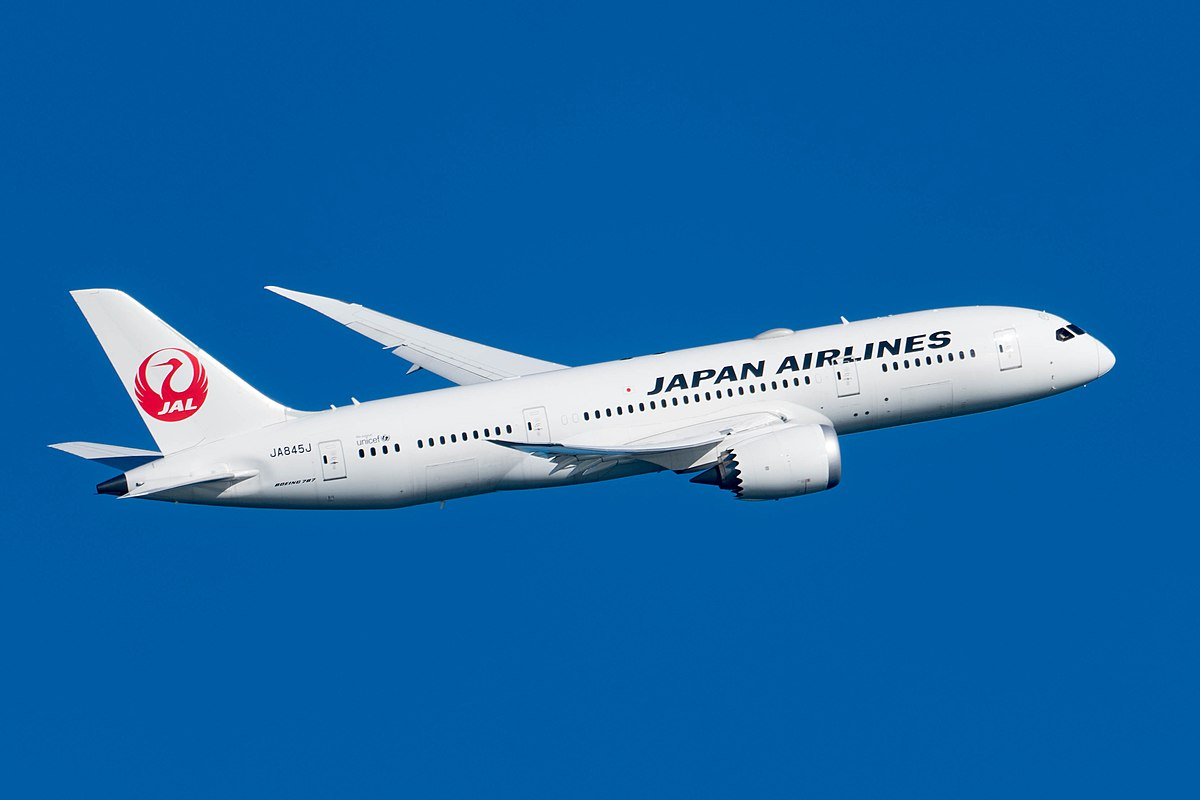


Conformación del equipo de trabajo:
1. Ramiro Moreschi
2. Daniel Noez
3. Bruno Ezequiel Cangaro

In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Data acquisition
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
#Data wrangling
#Eliminamos la columna 'Unnamed: 0' ya que no aporta nada
data = df.drop(columns = ['Unnamed: 0']) 

In [ ]:
data['Arrival Delay in Minutes'].fillna(0, inplace = True)

In [ ]:
#EDA
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
#Tamaño de nuestro dataset
data.shape

(103904, 24)

In [ ]:
#Tipos de datos
data.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [ ]:
#Totalidad de registros por columnas
data.count()    #Arrival Delay in Minutes es la columna con menos datos

id                                   103904
Gender                               103904
Customer Type                        103904
Age                                  103904
Type of Travel                       103904
Class                                103904
Flight Distance                      103904
Inflight wifi service                103904
Departure/Arrival time convenient    103904
Ease of Online booking               103904
Gate location                        103904
Food and drink                       103904
Online boarding                      103904
Seat comfort                         103904
Inflight entertainment               103904
On-board service                     103904
Leg room service                     103904
Baggage handling                     103904
Checkin service                      103904
Inflight service                     103904
Cleanliness                          103904
Departure Delay in Minutes           103904
Arrival Delay in Minutes        

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [ ]:
for col in df.select_dtypes('O').columns:
  print(col)
  print(df[col].value_counts())
  print('--'*10)

Gender
Female    52727
Male      51177
Name: Gender, dtype: int64
--------------------
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
--------------------
Type of Travel
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
--------------------
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
--------------------
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64
--------------------


In [ ]:
#Principales Estadisticos
data.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
#Pivot de la funcion describe para visualizar mejor nuestros datos
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [ ]:
# DATA SET FINAL
data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


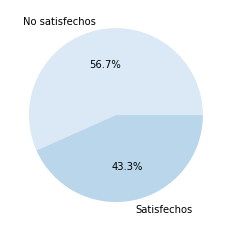

In [ ]:
plt.pie(data.satisfaction.value_counts(), labels = ["No satisfechos", "Satisfechos"], colors = sns.color_palette("Blues"), autopct = '%1.1f%%')
pass
#Se puede observar que con respecto al total de encuestados, los porcentajes de satisfechos y no satisfechos están equilibrados

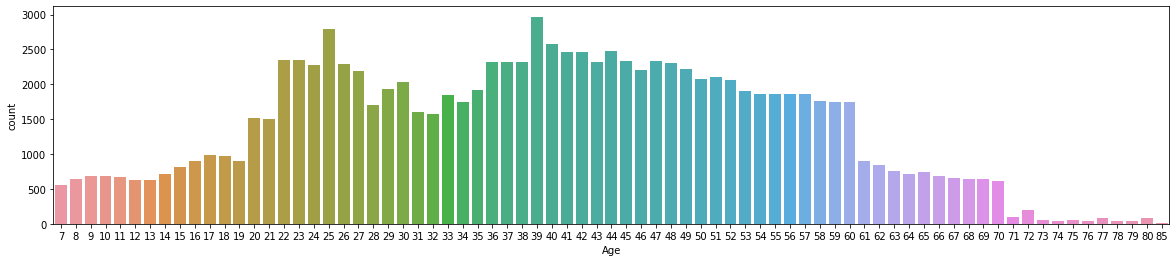

In [ ]:
#Analisis univariado, buscamos analizar las edades para ver que rango de las mismas es el que tomo mas cantidad de vuelos
plt.figure(figsize=(20, 4))
edad = sns.countplot(x='Age', data=data)

In [ ]:
#Analisis bivariado, relacion entre clase de vuelo y distancia de vuelo
df.groupby('Class')['Flight Distance'].mean()


Class
Business    1675.976925
Eco          743.439748
Eco Plus     747.125567
Name: Flight Distance, dtype: float64

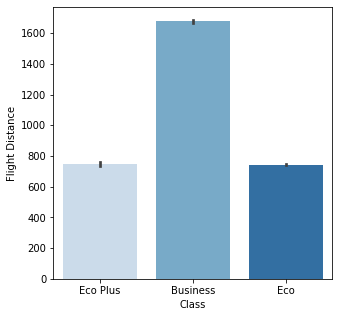

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='Class', y='Flight Distance', data=data, palette="Blues")
#Podemos observar como los vuelos de Business Class realizan distancias mas largas

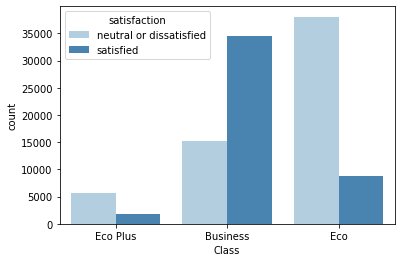

In [ ]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "Blues", data = data)
plt.show()
#Puede ver que la mayoría de los pasajeros que volaron en clase económica plus o económica no estaban satisfechos con el vuelo, y los que tuvieron la suerte de volar en clase ejecutiva estaban satisfechos.

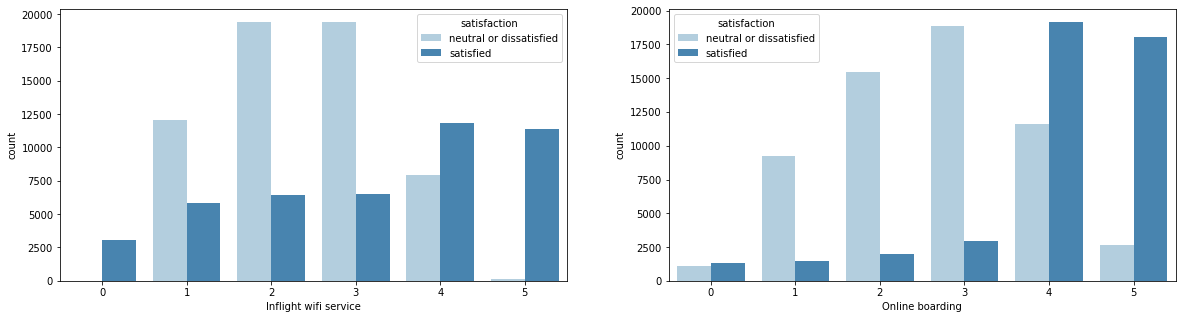

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "Blues", data = data,ax = ax[0])
sns.countplot(x = 'Online boarding', hue = 'satisfaction', palette = "Blues", data = data, ax = ax[1])
plt.show()
#Los clientes que puntuaron 4 y 5 los servicios a bordo y wifi, en su mayoria luego quedaron como satisfechos

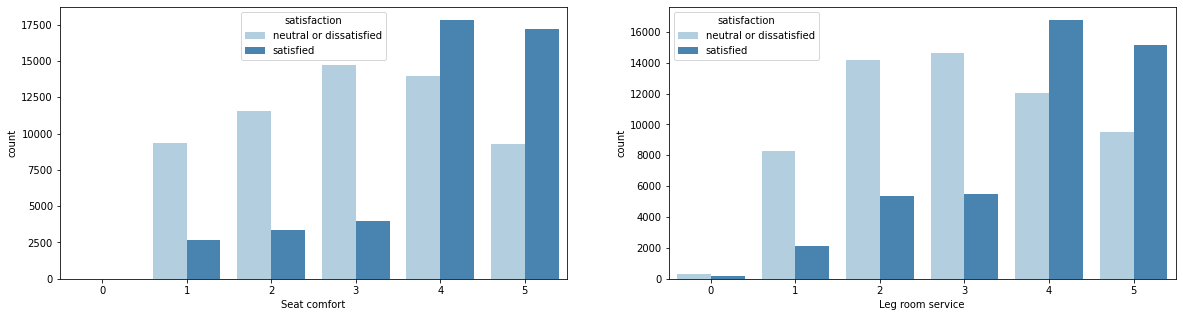

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "Blues", data = data,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "Blues", data = data, ax = ax[1])
plt.show()
#Los clientes que puntuaron 4 y 5 la confortabilidad del asiento, en su mayoria luego quedaron como satisfechos

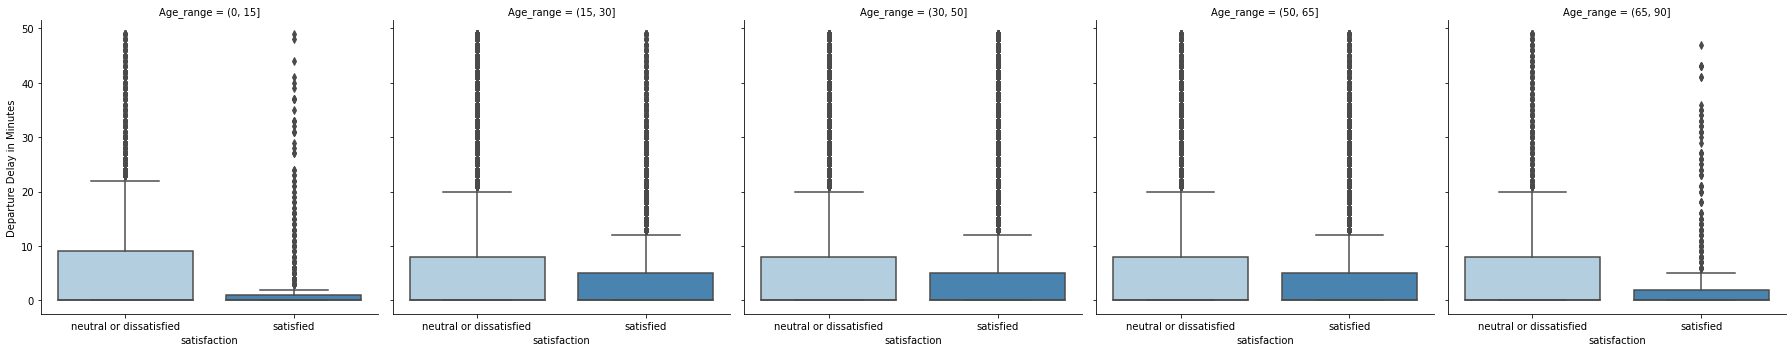

In [ ]:
#Analisis multivariado
data['Age_range'] = pd.cut(df.Age, bins=[0, 15, 30, 50, 65, 90])

def fixed_boxplot(*args, label=None, **kwargs):
  sns.boxplot(*args, **kwargs, labels=[label])

sns.FacetGrid(data[data['Departure Delay in Minutes']<50], col = 'Age_range', height = 5).map(fixed_boxplot).map(sns.boxplot, 'satisfaction','Departure Delay in Minutes', order=['neutral or dissatisfied', 'satisfied'], palette= "Blues")

plt.show()

#Se puede observar que cuanto menor (0-15) es la edad del pasajero, mas disconforme se encuentran con respecto al retraso en la salida del vuelo
#Se puede observar que cuanto mayor (65-90) es la edad del pasajero, mas disconforme se encuentran con respecto al retraso en la salida del vuelo

# **REGRESION LOGISTICA**
Se realiza un analisis de regresión logística y una matriz de confusión para ver la visualización del desempeño de un algoritmo.
se calculan las métricas de precisión, recall, F1 y curva de ROC.

In [ ]:
data[['Arrival Delay in Minutes']] = data[['Arrival Delay in Minutes']].astype(int)

In [ ]:
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_range
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,3,4,4,5,5,25,18,neutral or dissatisfied,"(0, 15]"
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,5,3,1,4,1,1,6,neutral or dissatisfied,"(15, 30]"
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,3,4,4,4,5,0,0,satisfied,"(15, 30]"
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,5,3,1,4,2,11,9,neutral or dissatisfied,"(15, 30]"
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,4,4,3,3,3,0,0,satisfied,"(50, 65]"


In [ ]:
df_procesado = pd.get_dummies(df.drop(['Unnamed: 0', 'id'], axis=1), columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class'],drop_first=True)
df_procesado

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,neutral or dissatisfied,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,neutral or dissatisfied,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,satisfied,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,neutral or dissatisfied,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,satisfied,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,3,2,3,0.0,neutral or dissatisfied,0,1,0,1,0
103900,49,2347,4,4,4,4,2,4,5,5,...,5,4,0,0.0,satisfied,1,0,0,0,0
103901,30,1995,1,1,1,3,4,1,5,4,...,5,4,7,14.0,neutral or dissatisfied,1,1,0,0,0
103902,22,1000,1,1,1,5,1,1,1,1,...,4,1,0,0.0,neutral or dissatisfied,0,1,0,1,0


In [ ]:
#Reemplazo satisfaction por 0 y 1 para poder ingresar los datos en el modelo
df_procesado['satisfaction'] = df_procesado['satisfaction'].replace('neutral or dissatisfied', 0)
df_procesado['satisfaction'] = df_procesado['satisfaction'].replace('satisfied', 1)
df_procesado.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,1,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1,1,0,0,0,0


In [ ]:
#Eliminamos los N/A del dataset
df_procesado['Arrival Delay in Minutes'].fillna(0, inplace = True)
df_procesado.dropna(inplace=True)
df_procesado.isna().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Gender_Male                          0
Customer Type_disloyal Customer      0
Type of Travel_Personal Travel       0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64

In [ ]:
#Creo una instancia de la regresión logística
regresion_logistica = LogisticRegression()

In [ ]:
X = df_procesado.drop('satisfaction', axis=1)
y = df_procesado.satisfaction
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
regresion = regresion_logistica.fit(X_train, y_train)
regresion

LogisticRegression()

In [ ]:
#Predicciones
y_train_pred = regresion.predict(X_train)
y_test_pred = regresion.predict(X_test)

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de evaluación:',train_accuracy)

% de aciertos sobre el set de evaluación: 0.8755155914865533


In [ ]:
#Calculo el ACCURACY en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8747914795329141


[[16091  1666]
 [ 2237 11178]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


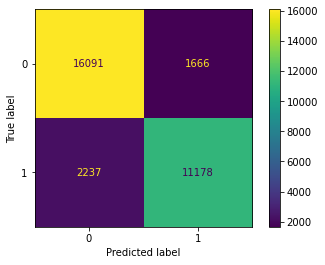

In [ ]:
# Visualización de la MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_test, y_test_pred))

plot_confusion_matrix(regresion, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import precision_score

print(f"La precision de la regresion es: {precision_score(y_test, y_test_pred)}")

La precision de la regresion es: 0.8702896293989412


In [ ]:
from sklearn.metrics import recall_score

# Recall
print(f"Recall de la regresion es: {recall_score(y_test, y_test_pred)}")

Recall de la regresion es: 0.8332463660081998


In [ ]:
from sklearn.metrics import f1_score

# Calculo del F1 score
print(f"F1 del arbol de la regresion es: {f1_score(y_test, y_test_pred)}")

F1 del arbol de la regresion es: 0.8513652462013025


AUC for our classifier is: 0.9268706323624197


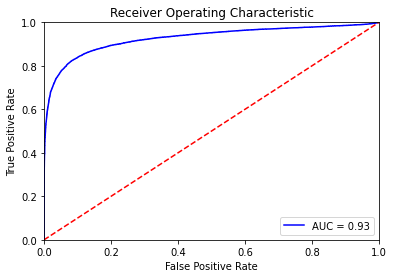

In [ ]:
from sklearn.metrics import roc_curve, auc

class_probabilities = regresion.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **ARBOL DE DECISION**
Se realiza un analisis de arbol de decisión y una matriz de confusión para ver la visualización del desempeño de un algoritmo.
se calculan las métricas de precisión, recall, F1 y curva de ROC.
Se optimiza el modelo probando distintos hiperparametros a través de un random search, poniendo como ebjetivo obtener el mejor "accurary" como salida.

In [ ]:
#Librerias a utilizar
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [ ]:
#Creamos el modelo de arbol de desición
#Visualizamos los parametros para decidir cuales elegir para optimizar
tree = DecisionTreeClassifier()
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
#Elegimos los parametros a optizar, le damos los datos al Random Search y luego lo entrenamos
parametros = {"criterion":("gini" , "entropy"),
              "max_features":("auto", "sqrt", "log2"),}

random_tree = RandomizedSearchCV(tree,
                  parametros,
                  scoring="accuracy")

random_tree.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2')},
                   scoring='accuracy')

In [ ]:
#Visualizamos el mejor score obtenido y los parametros elegidos de las pruebas de optimizacion de nuestro modelo
print(random_tree.best_score_)
print(random_tree.best_params_)

0.9272946698059007
{'max_features': 'log2', 'criterion': 'entropy'}


In [ ]:
#Creamos nuesto modelo de testeo y predicción
y_train_pred = random_tree.predict(X_train)
y_test_pred = random_tree.predict(X_test)

In [ ]:
#Obtenemos la métrica de ACCURACY en el train
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de evaluación:',train_accuracy)

% de aciertos sobre el set de evaluación: 1.0


In [ ]:
#Obtenemos la métrica de ACCURACY en el test
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)


% de aciertos sobre el set de evaluación: 0.9278519183882972


[[16647  1110]
 [ 1139 12276]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


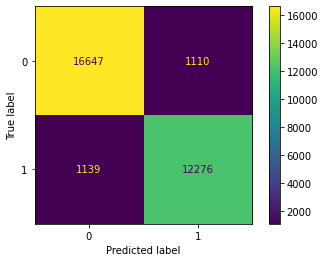

In [ ]:
#Visualización de la MATRIZ DE CONFUSION
print(confusion_matrix(y_test, y_test_pred))

plot_confusion_matrix(random_tree, X_test, y_test)
plt.show()

In [ ]:
#Obtenemos la métrica de PRECISION
from sklearn.metrics import precision_score

print(f"La precision del arbol de desición es: {precision_score(y_test, y_test_pred)}")

La precision del arbol de desición es: 0.9170775437023756


In [ ]:
#Obtenemos la métrica de RECALL
from sklearn.metrics import recall_score

print(f"Recall del arbol de desición es: {recall_score(y_test, y_test_pred)}")

Recall del arbol de desición es: 0.9150950428624673


In [ ]:
#Obtenemos la métrica de F1
from sklearn.metrics import f1_score

print(f"F1 del arbol de desición es: {f1_score(y_test, y_test_pred)}")

F1 del arbol de desición es: 0.9160852207007201


AUC for our classifier is: 0.9262922418231917


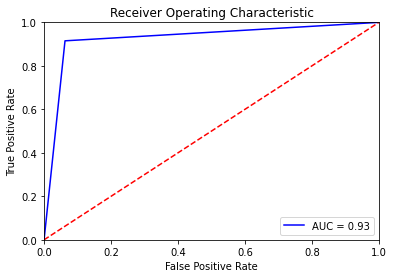

In [ ]:
from sklearn.metrics import roc_curve, auc

class_probabilities = random_tree.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráficamos de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **RANDOM FOREST**
Se realiza un analisis de random forest y una matriz de confusión para ver la visualización del desempeño de un algoritmo.
se calculan las métricas de precisión, recall, F1 y curva de ROC.
Se optimiza el modelo probando distintos hiperparametros a través de un random search, poniendo como ebjetivo obtener el mejor "accurary" como salida.

In [ ]:
#Creamos random forest
#Visualizamos los parametros para desicidir cuales elegir para optimizar
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Elegimos los parametros a optizar, le damos los datos al Random Search y luego lo entrenamos
parametros = {"criterion":("gini" , "entropy"),
              "n_estimators" : (10, 50, 100, 200, 250),
              "max_samples" : (1/4, 1/2, 3/4)}

random_forest = RandomizedSearchCV(forest,
                  parametros,
                  scoring="accuracy")

random_forest.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_samples': (0.25, 0.5, 0.75),
                                        'n_estimators': (10, 50, 100, 200,
                                                         250)},
                   scoring='accuracy')

In [ ]:
#Visualizamos el mejor score obtenido y los parametros elegidos de las pruebas de optimizacion de nuestro modelo
print(random_forest.best_score_)
print(random_forest.best_params_)

0.9595776595443732
{'n_estimators': 100, 'max_samples': 0.75, 'criterion': 'entropy'}


In [ ]:
#Creamos nuesto modelo de testeo y predicción
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [ ]:
#Obtenemos la métrica de ACCURACY en el train
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de evaluación:',train_accuracy)

% de aciertos sobre el set de evaluación: 0.9995187812792169


In [ ]:
#Obtenemos la métrica de ACCURACY
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9609264724752984


[[17402   355]
 [  863 12552]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


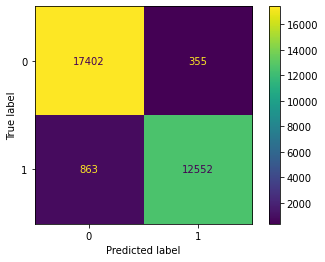

In [ ]:
#Visualización de la MATRIZ DE CONFUSION
print(confusion_matrix(y_test, y_test_pred))

plot_confusion_matrix(random_forest, X_test, y_test)
plt.show()

In [ ]:
#Obtenemos la métrica de PRECISION
from sklearn.metrics import precision_score

print(f"La precision del bosuqe es: {precision_score(y_test, y_test_pred)}")

La precision del bosuqe es: 0.972495545053072


In [ ]:
#Obtenemos la métrica de RECALL
from sklearn.metrics import recall_score

print(f"Recall bosque aleatorio es: {recall_score(y_test, y_test_pred)}")

Recall bosque aleatorio es: 0.9356690272083489


In [ ]:
#Obtenemos la métrica de F1
from sklearn.metrics import f1_score

print(f"F1 del bosque aleatorio es: {f1_score(y_test, y_test_pred)}")

F1 del bosque aleatorio es: 0.9537269204467745


AUC for our classifier is: 0.9936821249287211


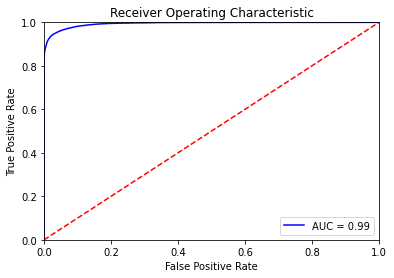

In [ ]:
from sklearn.metrics import roc_curve, auc

class_probabilities = random_forest.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la CURVA ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **SELECCION DE MODELO Y EXTRACCION DE VARIABLES MAS RELEVANTES**
En base a las métricas y rendimientos se elige el modelo Random Forest como modelo final.
A continuación se extraen las características importantes del clasificador Random Forest. Estas variables son las dimensiones identificadas que más valoran los clientes para sentirse satisfechos.

In [ ]:
modelo_final = RandomForestClassifier(n_estimators = 100, max_samples = 0.75, criterion = "entropy")

In [ ]:
numeric_variables = list(df_procesado.select_dtypes(include=['int64', 'float64']))
categorical_variables = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

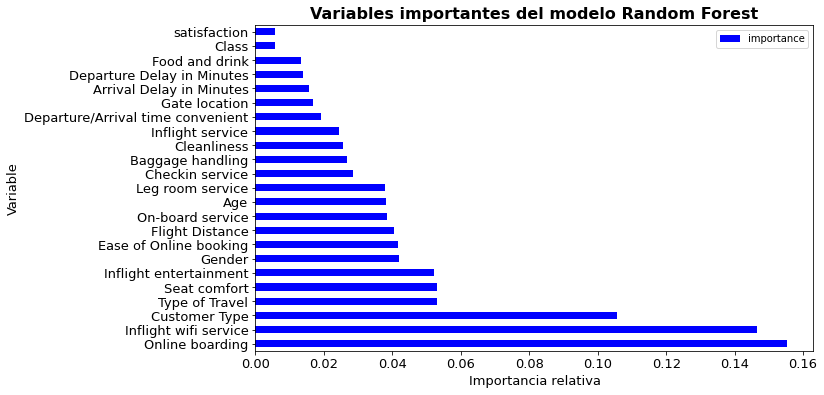

In [ ]:
#extract the important features from the final model
new_rf_clf = modelo_final
new_rf_clf.fit(X_train ,y_train) #fit the model
feature_importances = new_rf_clf.feature_importances_ 
attributes = numeric_variables + categorical_variables 
feat_importances = sorted(zip(feature_importances, attributes), reverse=True) #create a sorted tuple 

#visualize the feature importance of Random Forest
df_rf = pd.DataFrame(data = feat_importances) #create a dataframe 
df_rf.columns = ['importance', 'feature'] #rename the columns
df_rf.set_index('feature', inplace=True)#set the index 
fig, ax = plt.subplots(figsize=(10,6))
df_rf.plot(ax=ax, kind='barh', color ='Blue') #define the plot 

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.set_title('Variables importantes del modelo Random Forest', fontweight="bold", size =16) #set title 
ax.set_xlabel('Importancia relativa', fontsize = 13)
ax.set_ylabel('Variable', fontsize = 13);


# **CONCLUSION**
En base al analisis, sacamos las siguientes conclusiones:


1- las varables de edad, servicio de check in, reserva en línea, entretenimiento durante el vuelo y la calidad del wifi son las características más percibidas que determinan la satisfacción del cliente.

2- Entre los rangos de edad de menores de 15 y mayores de 65 años se ve graficamente que los afectan las demoras en los vuelos, ya que encontramos la mayor diferencia entre satisfechos y no satisfechos (mayoría de calificaiones negativas).

3-La mayoría de los pasajeros que volaron en clase económica plus o económica no estaban satisfechos con el vuelo, y los que volaron en clase ejecutiva estaban satisfechos (los pasajeros ECO son los menos satisfechos).

4-Los clientes que puntuaron 4 y 5 la confortabilidad del asiento, en su mayoria luego quedaron como satisfechos.

5-#Los clientes que puntuaron 4 y 5 los servicios a bordo y la calidad del wifi, en su mayoria luego quedaron como satisfechos.

En general, nuestro algoritmo predictivo tiene un poder predictivo del 96 % para clasificar a los clientes y ayudar a las aerolíneas a monitorear y evaluar el desempeño del servicio.

RECOMENDACIONES HACIA LA AEROLINEA

1- Diseñar paquetes personalizados para clientes basados ​​en categorías de edad, especialmente dirigidos a adultos y personas mayores que están menos satisfechas.

2- Mejorar el acceso WiFi y el entretenimiento durante el vuelo.

3- Implementar el servicio de asistencia de reserva en línea para los clientes que navegan por su sitio web y plataformas de redes sociales.
